# Telecom Customer Churn 

## Imports and Loading the Data

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

In [47]:
df=pd.read_excel('/home/otsalah/myGithub/datasets/Telco_customer_churn.xlsx')
pd.set_option('display.max_column',None)
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


# Exploring the Data and Preprocessing

In [48]:
df.shape

(7043, 33)

In [49]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

i will drop the feature `churn Reason` for 2 reasons.
- First Reason: It has many null values
- Second Reason: It depends on the target value. This features tells us why this customer stopped using our service. So, i can not use it to predict if this customer will continue using our service or not.

In [50]:
df.drop('Churn Reason', axis=1, inplace=True)

**First of all**, I want to see if the churn probability is affected by the location of the customer.So i will create a new data frame that contains the unique cities and the number of customers in this city and the churn percentage.

In [51]:
cities = df.groupby('City')
cities.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,7750-EYXWZ,1,United States,California,Yucca Valley,92284,"34.159534, -116.425984",34.159534,-116.425984,Female,No,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No,0,24,3740
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560


In [52]:
unique_cities = df['City'].unique()
city_df = pd.DataFrame(unique_cities, columns=['City'])

city_df['customer_count'] = city_df['City'].apply(lambda x: df[df['City'] == x].shape[0])

def calculate_churn_percentage(city):
    city_data = df[df['City'] == city]
    churn_count = city_data[city_data['Churn Value'] == 1].shape[0]
    total_count = city_data.shape[0]
    return (churn_count / total_count) * 100

city_df['churn_percentage'] = city_df['City'].apply(calculate_churn_percentage)

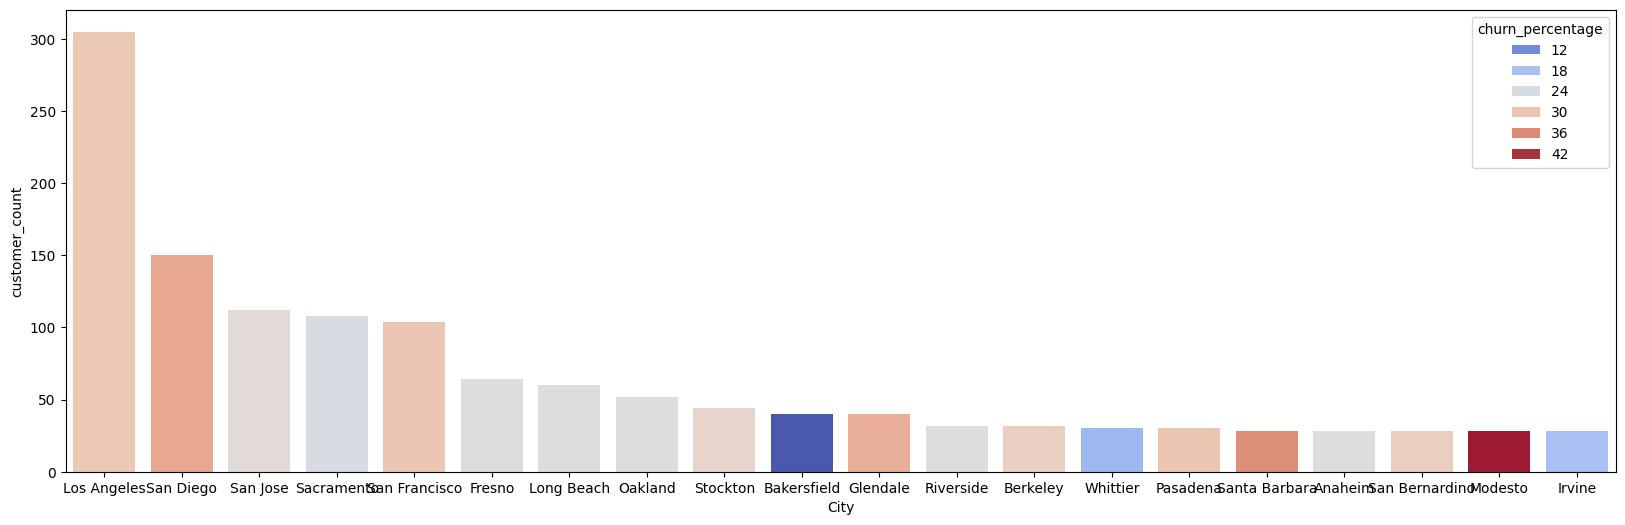

In [53]:
plt.figure(figsize=(20,6))
sns.barplot(data = city_df.sort_values('customer_count', ascending=False).head(20),
             x = 'City',
             hue='churn_percentage',
             y= 'customer_count',
             palette='coolwarm'
             
             )
plt.show()

As we see, we have high churn percentage (from 25 to 30 %) in the top 9 cities that are using our services.

I will create a function that returns the `type`, `unique values` and `the number of unique values` for every feature in a DataFrame

In [54]:
def columns_info(df):
  cols=[]
  dtypes=[]
  unqieu_v=[]
  n_unqieu_v=[]

  for col in df.columns:
    cols.append(col)
    dtypes.append(df[col].dtypes)
    unqieu_v.append(df[col].unique())
    n_unqieu_v.append(df[col].nunique())

  return pd.DataFrame({"names":cols,'types':dtypes,'unique':unqieu_v,'n_unique':n_unqieu_v})

In [55]:
columns_info(df)

,names,types,unique,n_unique
0,CustomerID,object,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",7043
1,Count,int64,[1],1
2,Country,object,[United States],1
3,State,object,[California],1
4,City,object,"[Los Angeles, Beverly Hills, Huntington Park, ...",1129
5,Zip Code,int64,"[90003, 90005, 90006, 90010, 90015, 90020, 900...",1652
6,Lat Long,object,"[33.964131, -118.272783, 34.059281, -118.30742...",1652
7,Latitude,float64,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",1652
8,Longitude,float64,"[-118.272783, -118.30742, -118.293953, -118.31...",1651
9,Gender,object,"[Male, Female]",2


**I will drop:**
- `CustomerID` : It is only a unique identification for every customer. It do not provide any info that helps in our task.
- `Count`, `Country`, `State` : The whole column is only one value. It do not provide any info. 
- `City`: It provide the same info that `Zip Code` provides. But `Zip Code` provides more accurate info. So, i will keep the `Zip Code` feature.
- `Lat Long` : Because this is equal to `Latitude` + `Longitude`
- `Churn Label` : It is the same as `Churn Value` but in text [Yes, No]

**I will change the type of:**
- `Total Charges` : from object to numeric as it is wrongly defined.

In [56]:
# Dropping features
df.drop(columns=['CustomerID','Count','Country','State','City','Lat Long','Churn Label'], axis=1, inplace=True)

In [57]:
# changing the dtype of Total Charges column from object to numeric
# any rows that were not able to be changed will be set to null

df['Total Charges']=pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'].isnull().sum()

11

In [58]:
# I will drop these 11 rows
df.dropna(inplace=True, axis=0)

**Now**, I will separate the numeric features and object features to make preprocessing for each one of them.

In [59]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
object_features = [feature for feature in df.columns if df[feature].dtype == 'object']
numeric_features.remove('Churn Value')
print(numeric_features)
print(object_features)

['Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']
['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']


In [60]:
columns_info(df[object_features])

,names,types,unique,n_unique
0,Gender,object,"[Male, Female]",2
1,Senior Citizen,object,"[No, Yes]",2
2,Partner,object,"[No, Yes]",2
3,Dependents,object,"[No, Yes]",2
4,Phone Service,object,"[Yes, No]",2
5,Multiple Lines,object,"[No, Yes, No phone service]",3
6,Internet Service,object,"[DSL, Fiber optic, No]",3
7,Online Security,object,"[Yes, No, No internet service]",3
8,Online Backup,object,"[Yes, No, No internet service]",3
9,Device Protection,object,"[No, Yes, No internet service]",3


I will **Replace** the `No phone service` and `No internet service` values to be `No`

In [61]:
df.replace('No phone service', 'No', inplace=True)
df.replace('No internet service', 'No', inplace=True)

In [62]:
columns_info(df[object_features])

,names,types,unique,n_unique
0,Gender,object,"[Male, Female]",2
1,Senior Citizen,object,"[No, Yes]",2
2,Partner,object,"[No, Yes]",2
3,Dependents,object,"[No, Yes]",2
4,Phone Service,object,"[Yes, No]",2
5,Multiple Lines,object,"[No, Yes]",2
6,Internet Service,object,"[DSL, Fiber optic, No]",3
7,Online Security,object,"[Yes, No]",2
8,Online Backup,object,"[Yes, No]",2
9,Device Protection,object,"[No, Yes]",2


I will separate the binary features to make them **0 or 1** features.

The features `Internet Service`, `Contract` and `Payment Method` will be **One Hot Encoded**

In [63]:
binary_features = [feature for feature in df.columns if len(df[feature].value_counts()) == 2 ]
binary_features.remove('Churn Value')

In [64]:
df['Gender'] = [1 if x == 'Male' else 0 for x in df['Gender']]
binary_features.remove('Gender')
for feature in binary_features:
    df[feature] = [1 if x == 'Yes' else 0 for x in df[feature]]

In [65]:
df = pd.get_dummies(data=df, columns=['Internet Service','Contract', 'Payment Method'], dtype='int')

In [66]:
columns_info(df)

,names,types,unique,n_unique
0,Zip Code,int64,"[90003, 90005, 90006, 90010, 90015, 90020, 900...",1652
1,Latitude,float64,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",1652
2,Longitude,float64,"[-118.272783, -118.30742, -118.293953, -118.31...",1651
3,Gender,int64,"[1, 0]",2
4,Senior Citizen,int64,"[0, 1]",2
5,Partner,int64,"[0, 1]",2
6,Dependents,int64,"[0, 1]",2
7,Tenure Months,int64,"[2, 8, 28, 49, 10, 1, 47, 17, 5, 34, 11, 15, 1...",72
8,Phone Service,int64,"[1, 0]",2
9,Multiple Lines,int64,"[0, 1]",2


**Now**, we need to scale our numeric features to be in range 0 to 1

In [67]:
numeric_features

['Zip Code',
 'Latitude',
 'Longitude',
 'Tenure Months',
 'Monthly Charges',
 'Total Charges',
 'Churn Score',
 'CLTV']

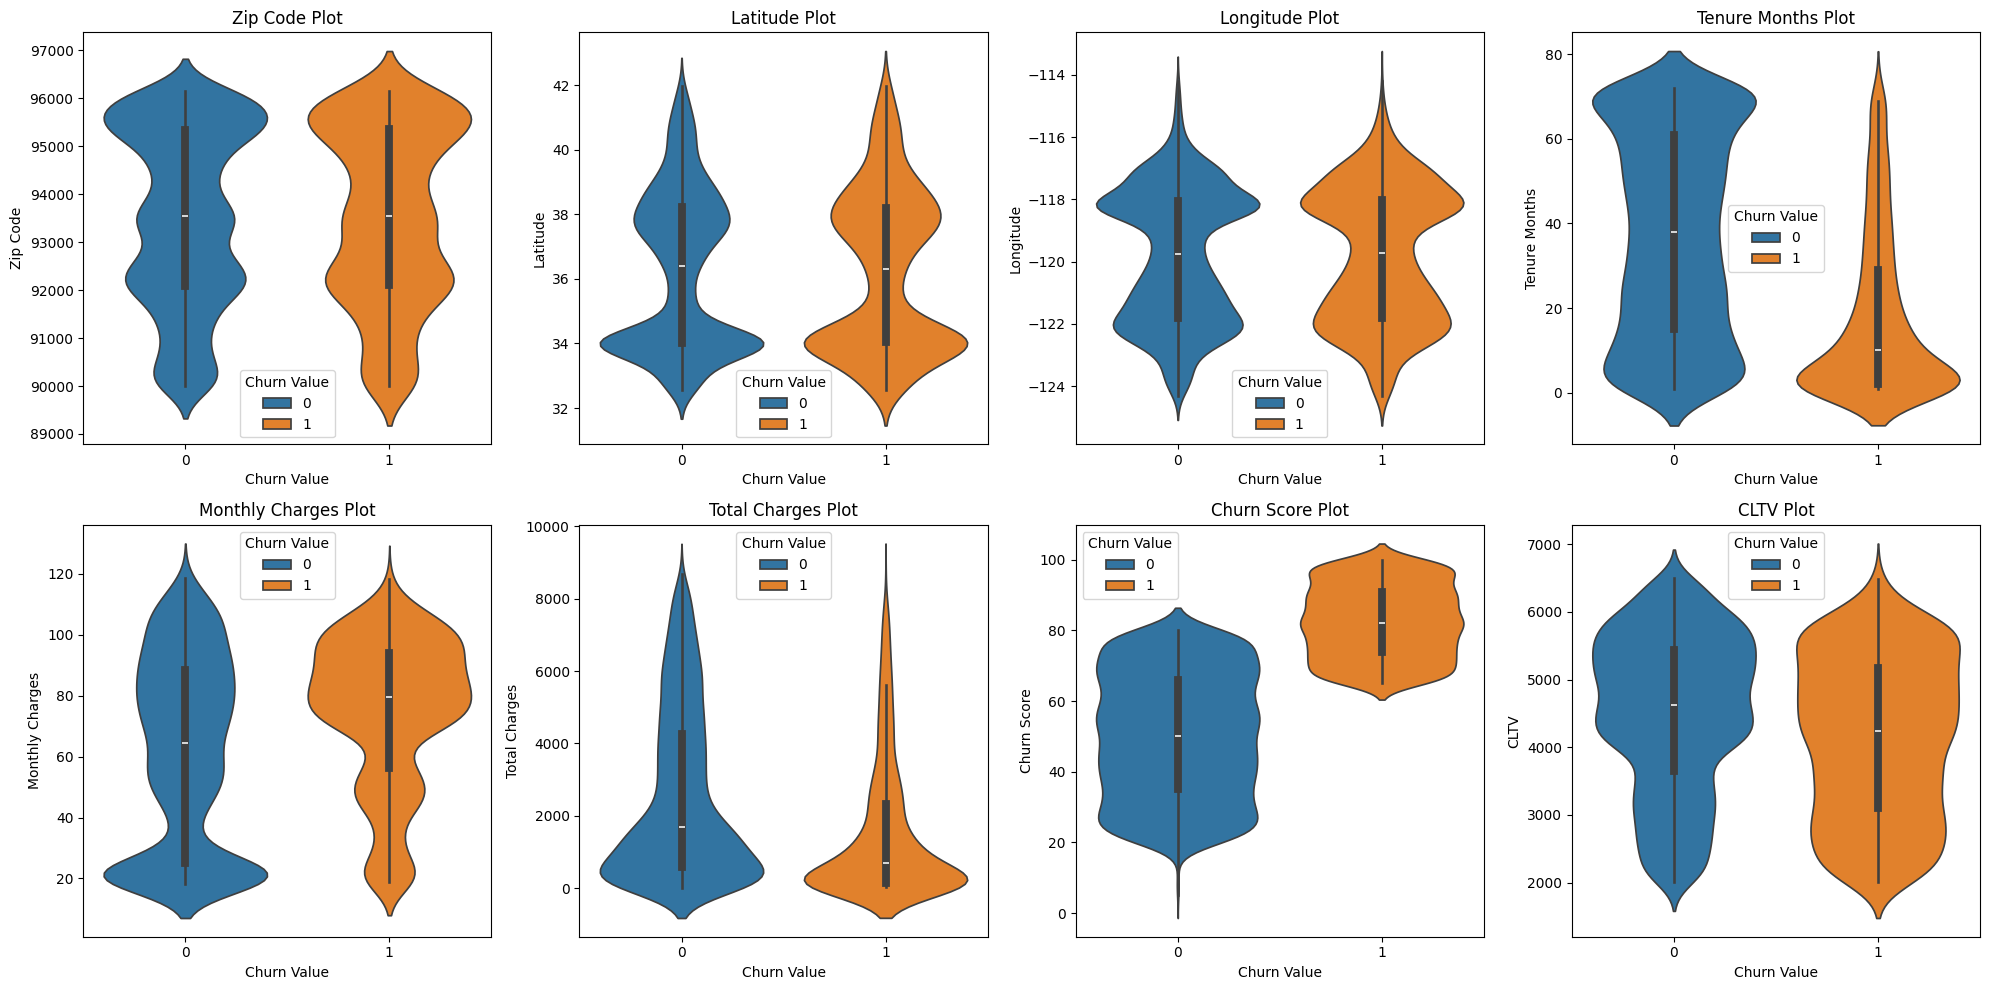

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.violinplot(ax=axes[i], data=df, y=feature, x='Churn Value', hue='Churn Value')
    axes[i].set_title(f'{feature} Plot')
plt.tight_layout()

**As we see**, this plot shows us that the feature related to the location like `Zip Code`, `Latitude` and `Longitude` are not affecting the results directly. The result is affected by the score and the charges.

In [69]:
binary_features = [feature for feature in df.columns if len(df[feature].value_counts()) == 2 ]
print(binary_features)
print(len(binary_features))

['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing', 'Churn Value', 'Internet Service_DSL', 'Internet Service_Fiber optic', 'Internet Service_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'Payment Method_Bank transfer (automatic)', 'Payment Method_Credit card (automatic)', 'Payment Method_Electronic check', 'Payment Method_Mailed check']
24


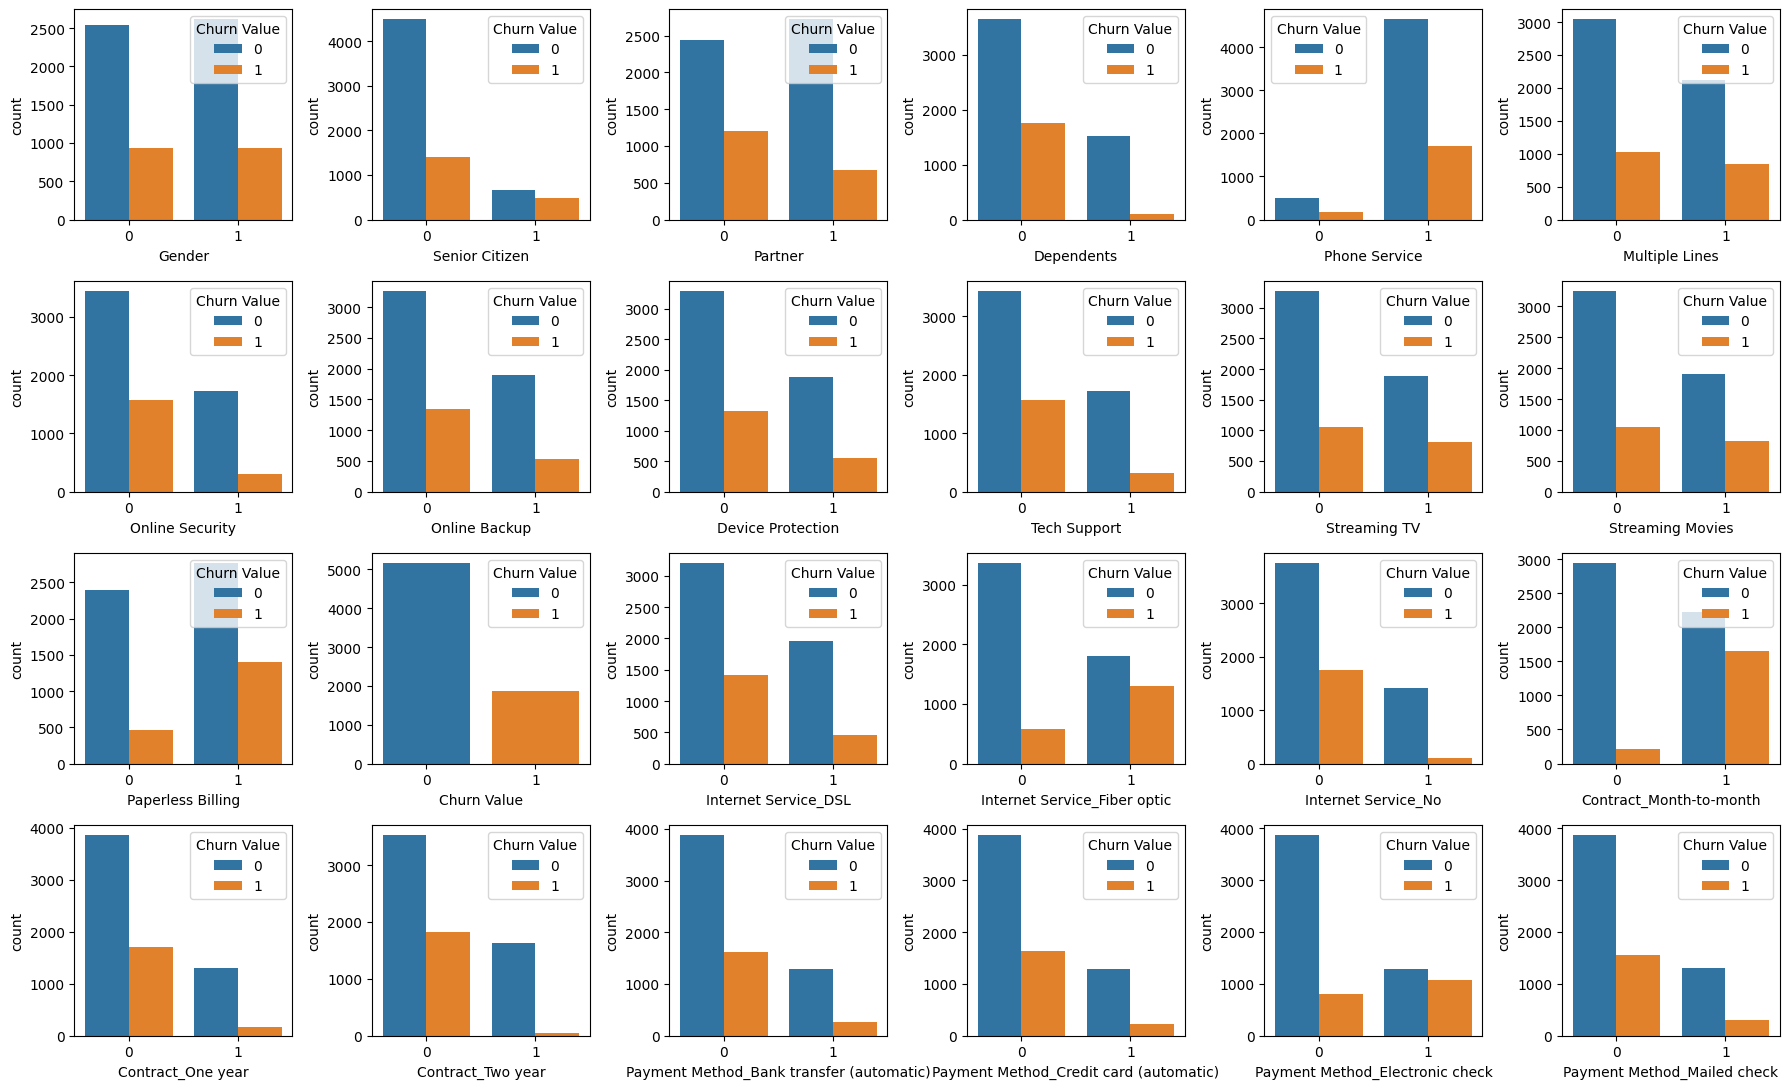

In [70]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(18, 11))
axes = axes.flatten()

for i, feature in enumerate(binary_features):
    sns.countplot(ax=axes[i], data=df, x=df[feature], hue='Churn Value')
plt.tight_layout()

**Some Insists**:
- Senior Citizens have *high* probability to churn.
- Dependents have *low* probability to churn.
- Customers that do not have these things are *more likely* to churn:
    - Online Security
    - Online Backup
    - Device Protection
    - Tech Support
- Customers that has **paperless billing** are more likely to Churn.
- **Internet Service**:
    - Customers that have No Service or have DSL service are more likely to stay.
    - Customers that have Fiber Optic service are more likely to churn. This means that our Fiber Optic Internet service has problems.
- **Contract Type**:
    - Customers that has One or Two Years contracts have very low probability to churn.
    - Customers that has Month-to-Month contracts have very high probability to churn.
- **Payment Method**:
    - Customers that pay by Bank Transfer or Credit card or Mailed check have low probability to churn.
    - Customers that pay by Electronic check have high probability to churn.

**After that**, I will split and scale the data.

In [71]:
X=df.drop('Churn Value',axis=1)
y=df['Churn Value']

In [72]:
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [74]:
# this is the churn percentage in our training data
y_train.sum() / len(y_train)

0.26542564317088474

I will use SMOTE to handle the data imbalnce.

In [75]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [76]:
y_resampled.sum() / len(y_resampled)

0.5

## Building and Compiling the Model

In [77]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

/home/otsalah/anaconda3/envs/deep-gpu/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
adam = Adam(learning_rate = .001 ,beta_1 = .9 ,beta_2 = .9)
model.compile(loss='binary_crossentropy', optimizer = adam, metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,291 (36.29 KB)

 Trainable params: 9,291 (36.29 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model 

In [80]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_resampled,
                    y_resampled,
                    epochs=100,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    callbacks=early_stopping,
                    verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.6089 - loss: 0.6494 - val_accuracy: 0.8152 - val_loss: 0.5384
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7976 - loss: 0.5044 - val_accuracy: 0.8661 - val_loss: 0.3839
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8502 - loss: 0.3875 - val_accuracy: 0.8886 - val_loss: 0.2880
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8842 - loss: 0.3111 - val_accuracy: 0.8957 - val_loss: 0.2597
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9058 - loss: 0.2555 - val_accuracy: 0.9017 - val_loss: 0.2402
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9092 - loss: 0.2344 - val_accuracy: 0.8957 - val_loss: 0.2417
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9160 - loss: 0.2199 - val_accuracy: 0.8993 - val_loss: 0.2326
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9166 - loss: 0.2128 - val_accuracy: 0.8993 -

## Evaluating the Model

In [81]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

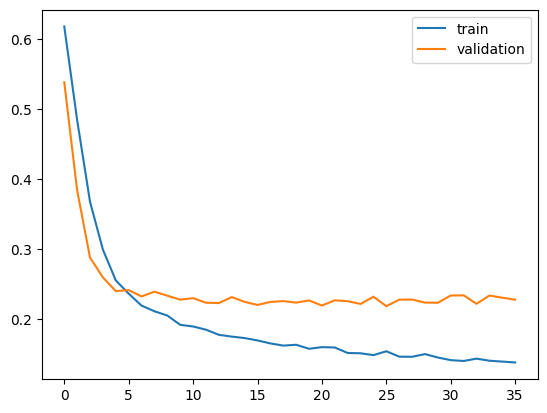

In [82]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

In [83]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

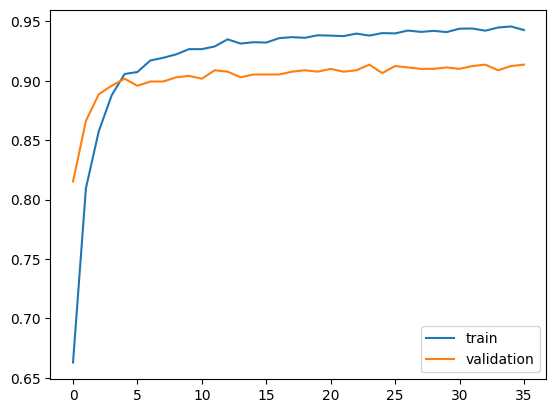

In [84]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

In [85]:
yp = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [86]:
y_pred = []
for element in yp:
    if element> 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1012
           1       0.80      0.91      0.85       395

    accuracy                           0.91      1407
   macro avg       0.88      0.91      0.89      1407
weighted avg       0.92      0.91      0.91      1407



Text(50.722222222222214, 0.5, 'True')

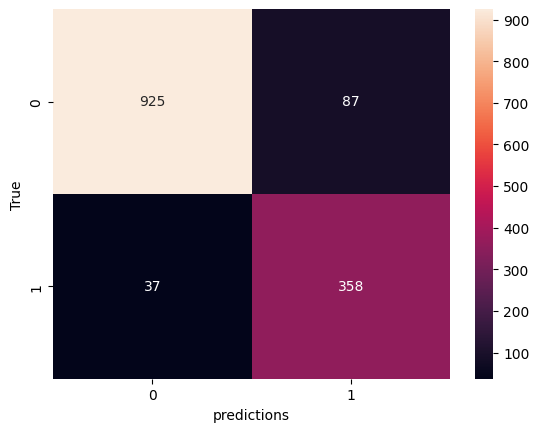

In [88]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predictions')
plt.ylabel("True")

I want higher recall for Churn = 1. So, i will decrease the threshold to 0.4

In [89]:
y_pred = []
for element in yp:
    if element> 0.4:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1012
           1       0.78      0.92      0.84       395

    accuracy                           0.90      1407
   macro avg       0.87      0.91      0.89      1407
weighted avg       0.91      0.90      0.91      1407



Text(50.722222222222214, 0.5, 'True')

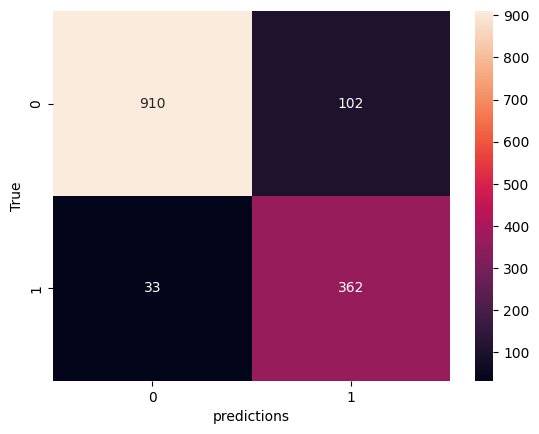

In [90]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predictions')
plt.ylabel("True")